<a href="https://colab.research.google.com/github/silvererudite/simulationAndModeling/blob/main/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import sympy
from sympy import *
import matplotlib.pyplot as plt
from sympy.plotting import plot
plt.rcParams['figure.figsize'] = 15, 5
init_printing(use_unicode=True)

In [28]:
x, t=symbols('x, t')
eqn1= (exp(-(x-3*t)**2))*sin(3*pi*(x-t)) #Defining the equation
pprint(eqn1)

            2                    
 -(-3⋅t + x)                     
ℯ            ⋅sin(π⋅(-3⋅t + 3⋅x))


/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


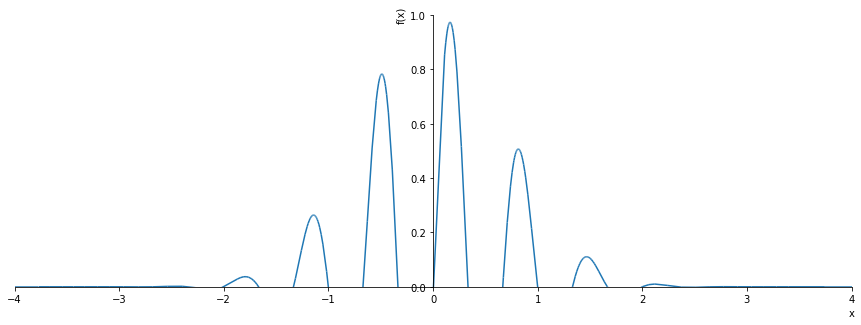

In [29]:
# ex 5.28
x1 = np.linspace(-4,4, 10)
t = 0
eqn1 = eqn1.subs('x', x1)
eqn1 = eqn1.subs('t', 0)
plot(eqn1, (x, -4, 4))



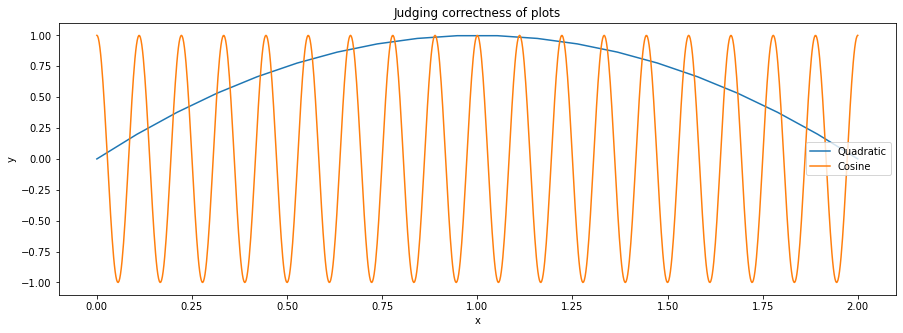

In [30]:
#Exercise 5.29
x = np.linspace(0, 2, 20)
y = x*(2 - x)
plt.plot(x, y)
x = np.linspace(0, 2, 1000)
y = np.cos(18*np.pi*x)

# fig, axs = plt.subplots(2)
# fig.suptitle('Quadratic and cosine function plots')
# axs[0].plot(x1, y1)
# axs[1].plot(x2, -y2)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Quadratic','Cosine'])
plt.title('Judging correctness of plots')
plt.show()


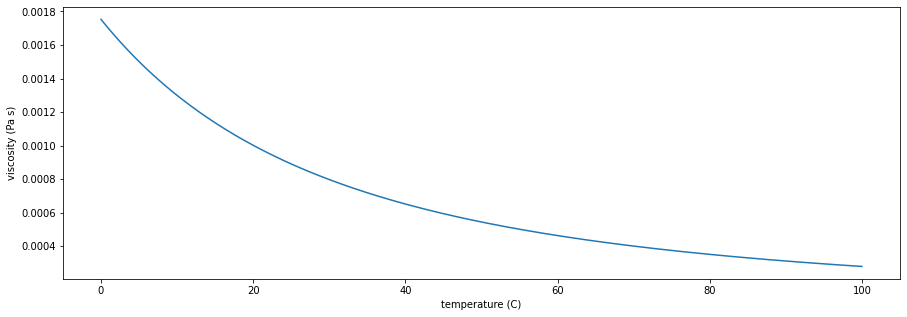

In [31]:
#Exercise 5.30

####### this implementation is not working
# A, B, T, C =symbols('A, B, T, C')
# eqn2=  A * 10 ** (B/(T+273.15-C))#Defining the equation
# #pprint(eqn2)
# x_val=np.linspace(0,100, 1000)
# eqn2 = eqn2.subs({A:2.414e-5,B:247.8,T:x_val,C:140})
# plot(eqn2)

A = 2.414e-5
B = 247.8
C = 140.0
T=np.linspace(0,100, 1000)
eqn2 = A * 10 ** (B / (T + 273.15 - C))
plt.plot(T, eqn2)
plt.ylabel('viscosity (Pa s)')
plt.xlabel('temperature (C)')
plt.show()


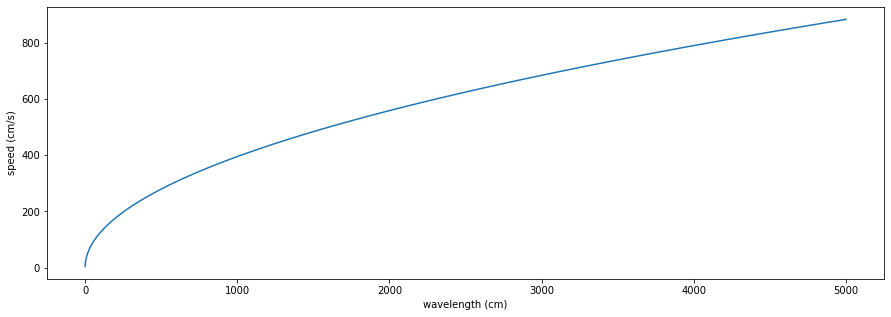

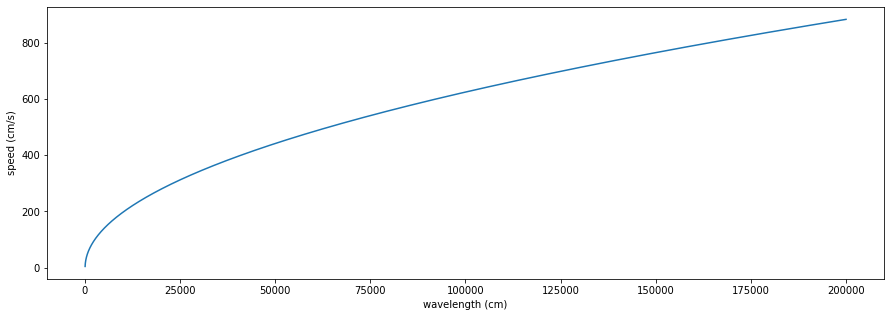

In [32]:
#exercise 5.31
g = 981
s = 7.9e-4
p = 1
h=5000
l = np.linspace(0.1, 5000, 50000)
eqn3= np.sqrt(g * l / (2 * np.pi) *(1 + s * 4 * np.pi ** 2 / (p * g * l ** 2)) *np.tanh(2 * np.pi * h / l))

plt.plot(l,eqn3)
plt.xlabel('wavelength (cm)')
plt.ylabel('speed (cm/s)')
plt.show()

l = np.linspace(100, 200000, 50000)
plt.plot(l, eqn3)
plt.xlabel('wavelength (cm)')
plt.ylabel('speed (cm/s)')
plt.show()

In [42]:
# Exercise 9.1
class Line(object):
  def __init__(self, c0, c1):
    self.c0 = c0
    self.c1 = c1
  def __call__(self, x):
    return self.c0 + self.c1*x
  def table(self, L, R, n):
    """Return a table with n points for L <= x <= R."""
    s = ""
 
    for x in np.linspace(L, R, n):
      y = self(x)
      s += '%12g %12g\n' % (x, y)
    return s
class Parabola0(Line):
  def dump(self):
    print(self.__dict__)

p = Parabola0(2,1)
p.dump()

  


{'c0': 2, 'c1': 1}


In [46]:
# Exercise 9.2
class Parabola(Line):

    def __init__(self, c0, c1, c2):
        Line.__init__(self, c0, c1) 
        self.c2 = c2

    def __call__(self, x):
        print('this is the Parabola')
        return Line.__call__(self, x) + self.c2 * x ** 2


class Cubic(Parabola):

    def __init__(self, c0, c1, c2, c3):
        Parabola.__init__(self, c0, c1, c2)
        self.c3 = c3

    def __call__(self, x):
        print('this is Cubic')
        return Parabola.__call__(self, x) + self.c3 * x ** 3


class Poly4(Cubic):

    def __init__(self, c0, c1, c2, c3, c4):
        Cubic.__init__(self, c0, c1, c2, c3)
        self.c4 = c4

    def __call__(self, x):
        print('this is Poly4')
        return Cubic.__call__(self, x) + self.c4 * x ** 4
  
  
  
  
    



In [47]:
# Exercise 9.3
class SinParabola(Parabola):

    def __init__(self, A, w, a, b, c):
        Parabola.__init__(self, a, b, c)
        self.A = A
        self.w = w

    def __call__(self, x):
        return Parabola.__call__(self, x) + self.A * np.sin(self.w * x)
